<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   address  500000 non-null  object
 1   name_ru  499030 non-null  object
 2   rating   500000 non-null  int64 
 3   rubrics  500000 non-null  object
 4   text     500000 non-null  object
 5   tone     500000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 22.9+ MB
None
             rating           tone
count  500000.00000  500000.000000
mean        4.48160       1.687752
std         1.14625       0.633487
min         0.00000       0.000000
25%         5.00000       2.000000
50%         5.00000       2.000000
75%         5.00000       2.000000
max         5.00000       2.000000
tone
2    390515
1     62846
0     46639
Name: count, dtype: int64


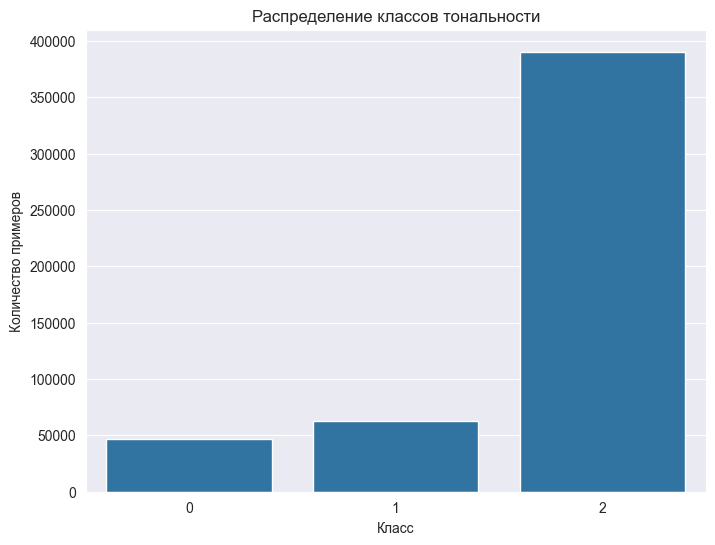

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка данных
data = pd.read_parquet('train.parquet')

def rating_to_sentiment(rating):
    if rating >= 5:
        return 2  # положительный
    elif rating == 3 or rating == 4:
        return 1  # нейтральный
    else:
        return 0  # отрицательный
       
data['tone'] = data['rating'].apply(rating_to_sentiment)  

# 1. Общая информация о данных

print(data.info())  # Типы данных, количество непустых значений
print(data.describe())  # Статистические характеристики числовых столбцов

# 2. Анализ распределения классов

# Подсчет количества примеров для каждого класса
class_counts = data['tone'].value_counts()
print(class_counts)

# Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение классов тональности')
plt.xlabel('Класс')
plt.ylabel('Количество примеров')
plt.show()

# 

In [23]:
import pandas as pd

# Загрузка данных
data = pd.read_parquet('train.parquet')

def rating_to_sentiment(rating):
    if rating >= 5:
        return 2  # положительный
    elif rating == 3 or rating == 4:
        return 1  # нейтральный
    else:
        return 0  # отрицательный
    
    
data['tone'] = data['rating'].apply(rating_to_sentiment)      
    

# 1. Разделение данных по классам
class_0_df = data[data['tone'] == 0]
class_1_df = data[data['tone'] == 1]
class_2_df = data[data['tone'] == 2]

# 2. Выбор одной трети данных класса 2
class_2_sample_df = class_2_df.sample(frac=1/6, random_state=42)  # random_state для воспроизводимости

# 3. Объединение датафреймов
balanced_data = pd.concat([class_0_df, class_1_df, class_2_sample_df], ignore_index=True)

# 4. Перемешивание данных (опционально)
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Перемешивание

# 5. Сохранение сбалансированного датафрейма (опционально)
balanced_data.to_parquet('balanced_data.parquet')

print(balanced_data['tone'].value_counts())  # Проверка распределения классов

tone
2    65086
1    62846
0    46639
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  87285 non-null  object
 1   name_ru  87129 non-null  object
 2   rating   87285 non-null  int64 
 3   rubrics  87285 non-null  object
 4   text     87285 non-null  object
 5   tone     87285 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.0+ MB
None
             rating          tone
count  87285.000000  87285.000000
mean       3.519963      1.108106
std        1.524837      0.793054
min        0.000000      0.000000
25%        2.000000      0.000000
50%        4.000000      1.000000
75%        5.000000      2.000000
max        5.000000      2.000000
tone
2    32676
1    31369
0    23240
Name: count, dtype: int64


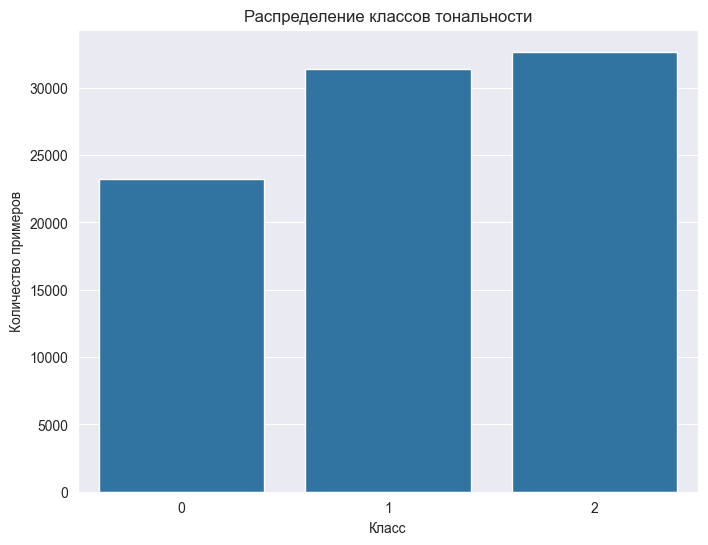

count    87285.000000
mean       375.378095
std        382.727889
min          2.000000
25%        159.000000
50%        257.000000
75%        460.000000
max      20162.000000
Name: text_length, dtype: float64


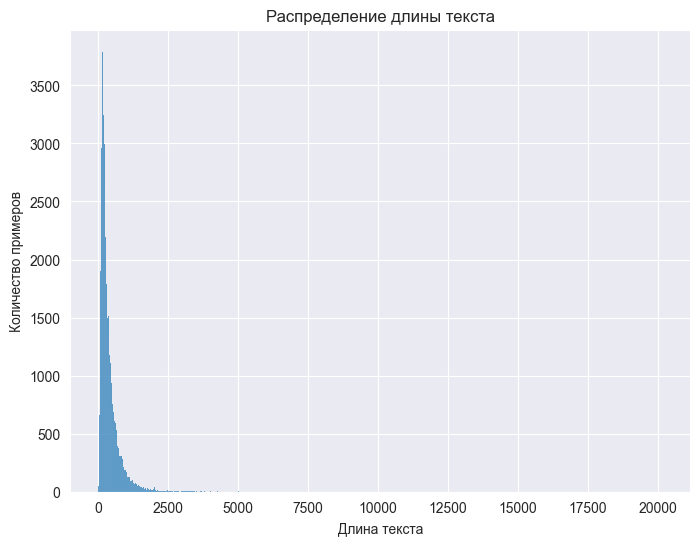

count    87285.000000
mean        55.807791
std         59.091581
min          1.000000
25%         22.000000
50%         37.000000
75%         69.000000
max       2918.000000
Name: word_count, dtype: float64


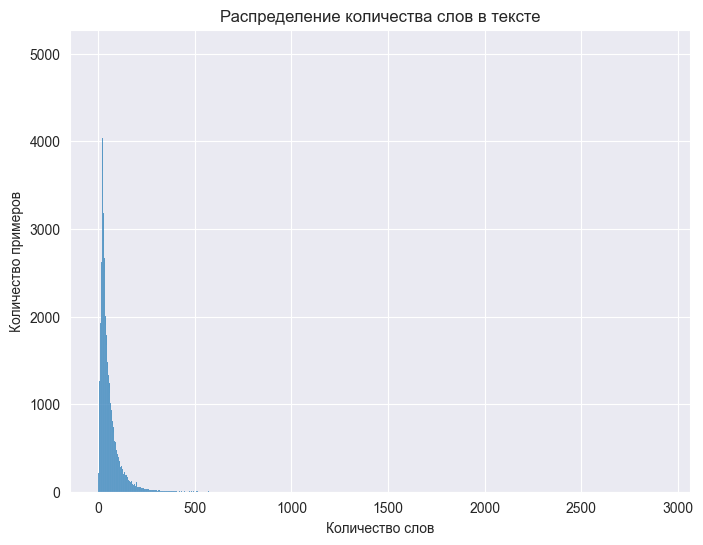

Наиболее частые слова в положительных отзывах:
[('и', 51955), ('в', 27824), ('на', 19096), ('с', 15758), ('не', 14238), ('очень', 13939), ('что', 8784), ('все', 8076), ('для', 7922), ('за', 6963), ('по', 6788), ('Очень', 6579), ('-', 5705), ('к', 5155), ('есть', 5016), (',', 4863), ('но', 4798), ('как', 4495), ('это', 4293), ('всегда', 4282)]
Наиболее частые слова в отрицательных отзывах:
[('не', 58108), ('и', 56240), ('в', 49477), ('на', 35483), ('что', 27704), ('с', 21797), ('по', 11521), ('за', 11277), ('это', 10592), ('я', 10437), ('как', 10364), ('но', 9608), ('а', 9473), (',', 9012), ('к', 8384), ('все', 7951), ('-', 7631), ('у', 7591), ('так', 7454), ('было', 6542)]
Наиболее частые биграммы в положительных отзывах:
[(('и', 'не'), 1140), (('место', 'для'), 895), (('в', 'этом'), 843), (('и', 'в'), 814), (('и', 'очень'), 749), (('быстро', 'и'), 718), (('на', 'высшем'), 696), (('так', 'и'), 559), (('на', 'любой'), 514), (('и', 'на'), 496), (('рядом', 'с'), 477), (('спасибо', 'за'), 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Загрузка данных
data = pd.read_parquet('balanced_data.parquet')
total_rows = data.shape[0]
data = data.iloc[:total_rows//2]

def rating_to_sentiment(rating):
    if rating >= 5:
        return 2  # положительный
    elif rating == 3 or rating == 4:
        return 1  # нейтральный
    else:
        return 0  # отрицательный
       
data['tone'] = data['rating'].apply(rating_to_sentiment)  

# 1. Общая информация о данных

print(data.info())  # Типы данных, количество непустых значений
print(data.describe())  # Статистические характеристики числовых столбцов

# 2. Анализ распределения классов

# Подсчет количества примеров для каждого класса
class_counts = data['tone'].value_counts()
print(class_counts)

# Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение классов тональности')
plt.xlabel('Класс')
plt.ylabel('Количество примеров')
plt.show()

# 3. Анализ длины текста

# Вычисление длины каждого текста
data['text_length'] = data['text'].str.len()

# Описательная статистика длины текста
print(data['text_length'].describe())

# Визуализация распределения длины текста
plt.figure(figsize=(8, 6))
sns.histplot(data['text_length'])
plt.title('Распределение длины текста')
plt.xlabel('Длина текста')
plt.ylabel('Количество примеров')
plt.show()

# 4. Анализ количества слов

# Функция для подсчета слов
def count_words(text):
    words = text.split()
    return len(words)

# Подсчет количества слов в каждом тексте
data['word_count'] = data['text'].apply(count_words)

# Описательная статистика количества слов
print(data['word_count'].describe())

# Визуализация распределения количества слов
plt.figure(figsize=(8, 6))
sns.histplot(data['word_count'])
plt.title('Распределение количества слов в тексте')
plt.xlabel('Количество слов')
plt.ylabel('Количество примеров')
plt.show()

# 5. Анализ наиболее частых слов с учетом тональности

def analyze_frequent_words(data, tone_class):
    tone_data = data[data['tone'] == tone_class]
    all_words = ' '.join(tone_data['text']).split()
    word_counts = Counter(all_words)
    
    # Удаление стоп-слов (опционально)
    # stop_words = set(stopwords.words('russian'))  
    # filtered_words = [word for word in all_words if word not in stop_words]
    # word_counts = Counter(filtered_words)

    return word_counts.most_common(20)  # 20 наиболее частых слов

# Примеры использования
print("Наиболее частые слова в положительных отзывах:")
print(analyze_frequent_words(data, 2))

print("Наиболее частые слова в отрицательных отзывах:")
print(analyze_frequent_words(data, 0))

# 6. Анализ N-грамм (n последовательных слов)

def analyze_ngrams(data, tone_class, n=2):
    tone_data = data[data['tone'] == tone_class]
    all_ngrams = nltk.ngrams(tone_data['text'].str.split().sum(), n)
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(20)

# Примеры использования
print("Наиболее частые биграммы в положительных отзывах:")
print(analyze_ngrams(data, 2, n=2))

# 7. Анализ наличия определенных слов или фраз

def analyze_keyword_presence(data, keywords):
    keyword_data = data[data['text'].str.contains('|'.join(keywords), case=False)]
    return keyword_data

# Пример использования
keywords = ['отлично', 'прекрасно', 'ужасно', 'плохо']
keyword_data = analyze_keyword_presence(data, keywords)
print(keyword_data.head())

In [25]:
import nltk
from nltk.corpus import stopwords

# Загрузка списка стоп-слов (замените на нужный язык)
stop_words = set(stopwords.words('russian'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)


In [26]:
import re

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)  # Удаление всего, кроме букв, цифр и пробелов
    return text


In [27]:
# Лемматизация (пример с nltk)
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmas)

# Стемминг (пример с nltk)
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")  # Замените на нужный язык

def stem_text(text):
    words = text.split()
    stems = [stemmer.stem(word) for word in words]
    return ' '.join(stems)

In [28]:
import re

def remove_html_and_urls(text):
    text = re.sub(r'<[^>]+>', '', text)  # Удаление HTML-тегов
    text = re.sub(r'https?://\S+', '', text)  # Удаление URL-адресов
    return text

In [29]:


def preprocess_text(text):
    text = remove_html_and_urls(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = text.lower()  # Нормализация
    return text


data['cleaned_text'] = balanced_data['text'].apply(preprocess_text)
data.to_parquet('cleaned_data.parquet')